### Linear and Polynomial Regression for Pumpkin Pricing - Lesson 3
#### Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data:

- Only get pumpkins priced by the bushel
- Convert the date to a month
- Calculate the price to be an average of high and low prices
- Convert the price to reflect the pricing by bushel quantity

In [12]:
import pandas as pd
from pandas import DatetimeIndex
import datetime
import numpy as np
import matplotlib.pyplot as plt


In [16]:
Pump = pd.read_csv('US-pumpkins.csv')

Pump.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [21]:
Month = DatetimeIndex(Pump['Date']).month
Price = (Pump['High Price'] + Pump['Low Price']) / 2
 #add a col day of the year 
Pump['Day of Year'] = DatetimeIndex(Pump['Date']).dayofyear



In [26]:
pumkins = pd.DataFrame({
                        'City': Pump['City Name'],
                        'Month': Month, 
                        'Date': Pump['Date'],
                        'Variety': Pump['Variety'], 
                        'Day of Year': Pump['Day of Year'],
                        'Package': Pump['Package'],
                        'Price': Price, 
                        'Low Price': Pump['Low Price'], 
                        'High Price': Pump['High Price']
                         })




In [27]:
pumkins = pumkins[pumkins['Package'].str.contains('bushel', case=True, regex= True)].reset_index(drop=True)

In [28]:
pumkins.loc[pumkins['Package'].str.contains('1 1/9 bushel' ), 'Price'] = pumkins['Price'] / (1+1/9)
pumkins.loc[pumkins['Package'].str.contains('1/2 bushel' ), 'Price'] = pumkins['Price'] / (1/2)

In [29]:
pumkins

,City,Month,Date,Variety,Day of Year,Package,Price,Low Price,High Price
0,BALTIMORE,9,9/24/16,PIE TYPE,268,1 1/9 bushel cartons,13.50,15.00,15.0
1,BALTIMORE,9,9/24/16,PIE TYPE,268,1 1/9 bushel cartons,16.20,18.00,18.0
2,BALTIMORE,10,10/1/16,PIE TYPE,275,1 1/9 bushel cartons,16.20,18.00,18.0
3,BALTIMORE,10,10/1/16,PIE TYPE,275,1 1/9 bushel cartons,15.30,17.00,17.0
4,BALTIMORE,10,10/8/16,PIE TYPE,282,1 1/9 bushel cartons,13.50,15.00,15.0
...,...,...,...,...,...,...,...,...,...
410,ST. LOUIS,9,9/30/16,MINIATURE,274,1/2 bushel cartons,30.00,15.00,15.0
411,ST. LOUIS,9,9/30/16,MINIATURE,274,1/2 bushel cartons,28.75,13.75,15.0
412,ST. LOUIS,9,9/30/16,MINIATURE,274,1/2 bushel cartons,25.75,10.75,15.0
413,ST. LOUIS,9,9/30/16,MINIATURE,274,1/2 bushel cartons,24.00,12.00,12.0


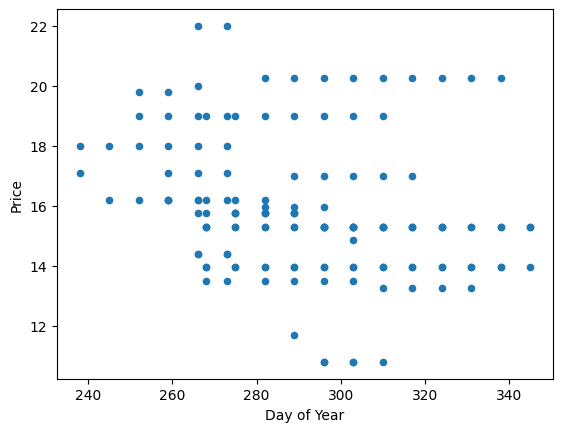

In [35]:
#filter for only pie pumkin
PIE_pumkins = pumkins[pumkins['Variety'] == 'PIE TYPE']
PIE_pumkins.plot.scatter(x='Day of Year', y='Price')
plt.show()

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [66]:
X= pumkins['Day of Year'].to_numpy().reshape(-1,1)
y = pumkins['Price']

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state = 42)
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)
y_pred = Lin_reg.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))


Mean Squared Error: 108.25839657480128
R^2 Score: -0.0026328620898472543


In [67]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=2)),
                     ('lin_reg', LinearRegression())])

pipeline.fit(X_train, y_train)
y_pred_poly = pipeline.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print('R^2 Score:', r2_score(y_test, y_pred_poly))

RMSE: 10.199782438559847
R^2 Score: 0.03647683338331753


### Assignment
#### Create a Regression Model
##### Instructions
In this lesson you were shown how to build a model using both Linear and Polynomial Regression. Using this knowledge, find a dataset or use one of Scikit-learn's built-in sets to build a fresh model. Explain in your notebook why you chose the technique you did, and demonstrate your model's accuracy. If it is not accurate, explain why.

In [41]:
#Using a Salary dataset to create a regression model
salary_data = pd.read_csv('Salary_dataset.csv')
salary_data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


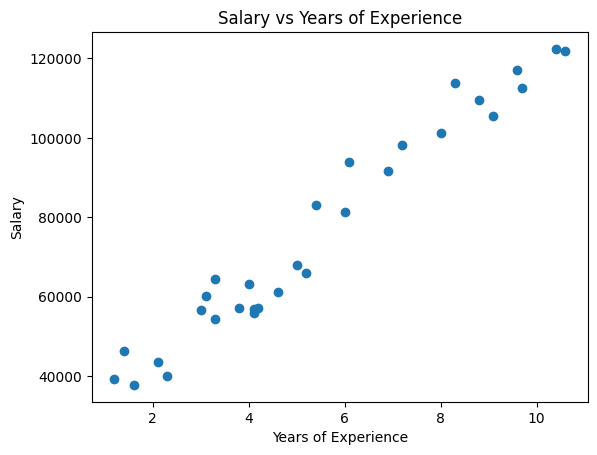

In [42]:
#lets visualize the data using scatter plot to check for linearilty
plt.scatter(salary_data['YearsExperience'], salary_data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.show()

In [60]:
# we have found out the data is linear so we will use linear regression to build our model
X = salary_data[['YearsExperience']]  # used a double bracket to convert to a Dataframe 
y = salary_data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#lets check the accuracy and rmse by finding the sqrt of mse

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2_score = r2_score(y_test, y_pred) 
print(f'RMSE:{RMSE}, \nR2_score:{R2_score}' )

RMSE:7059.043621901506, 
R2_score:0.9024461774180498


#### Conclusion 
- It means in average the model prediction is off by 7059
- The R2 score is almost one which is a good one 
- Lets convert the RMSE to percentage
- the RMSE is not up to 10% 

In [63]:
mean_salary = salary_data['Salary'].mean()
rmse_percentage = (RMSE/mean_salary) * 100
print(f'RMSE_%: {rmse_percentage}')

RMSE_%: 9.28772646426702


#### Polynomial Regression
When the data doesnt have a linear relationship but a curved relationship, polynomial regression is used